## Logistic Regression 

In linear regression, hypothesis function can be expressed as $\space h_\theta(x) = \theta ^T*X $. Logistic regression uses logistic or sigmoid function. Sigmoid function can be expressed as follows:

$$ f(x) = 1/(1+exp^{-x}) $$

Logistic regression is a supervised learning algorithm. We can define the hypothesis function of logistic regression as follows:

$$ h_\theta(x) = 1/(1+exp^{-\theta ^T *X})$$

where $ 0 \le h_\theta(\theta ^T *X) \le 1$

The above hypothesis function determinies the probability that y=1 for a given input of x. It is basically a conditional probability and can be expressed as follows:

$$ h_\theta(x) = P(y=1|x;\theta)$$

where $ P(y=1|x;\theta) = 1 -P(y=0|x;\theta) $

We can simplify the above hypothesis function as follows:

$$Y =1 \space if \space  h_\theta(x) \ge 0.5 $$ 

$$Y=0 \space if  \space  h_\theta(x) < 0.5 $$ 

The above expressions can be simplified as follows:

$$if \space \theta ^T *X > 0 \space then \space  h_\theta(x) \ge 0.5 \space and \space Y =1 $$

$$ \theta ^T * X \space = \space \theta_0 + \theta_1 *X_1 + \theta_2 *X_2 + \theta_3*X_3 + ......+\theta_n*X_n > 0$$

We can consider logistic regression as an optimization based algorithm to determine $\theta$ for a given input to staisfy the above equation.The above equations divide the feature space into two half. We can consider the above equation as the equation of decision boundary to seprate two classes in a feature space. Decision boundary is the property of hypothesis function. Decision boundary can be linear or non-lienar in nature. Like every optimization problem logistic regression also have an objective function. It is known as cost function. In linear regression, cost function is basically the MSE.It can be expressed as follows:

$$ J(\theta) = 1/2m \sum(Y_{predicted} - Y_i)^2$$

$$\space or \space J(\theta) = 1/2m \sum (h_\theta(x) - Y_i)^2$$

In logistic regression, the above quadratic cost function can't be used because of its non-convex nature. Cost function of the logistic regression can be expressed as follows:

$$ J_1(\theta) = -log(h_\theta(x)) \space if \space y=1 $$

$$ J_2(\theta) = -log(1-h_\theta(x)) \space if \space y=0$$

The above two equations can be further simplified as follows:

$$ J_{12}(\theta) = -y*log(h_\theta(x)) - (1-y)*log(1-h_\theta(x)) $$

$$ J(\theta) = 1/m \sum J_{12}(\theta) = - 1/m \sum [y*log(h_\theta(x)) + (1-y)*log(1-h_\theta(x))] $$

In regression, labelled column or target column is continuous variable. Labelled column or target column must be discrete variable in classification.In binary classification, target column should have two classes. In multiclass classification, target column should have multiple classes. Logistic regression can be used for both binary and multiclass classification.

The purpose of this tutorial is to give the following details to the student:
1. Data Cleaning
2. Outliers Detections
3. Exploratory Data Analysis (EDA) for Numeric Variables
4. Exploratory Data Analysis (EDA) for Categorical Variables
5. Determination of Class Imbalance
6. One Hot Encoding of Categorical Variables
7. Logistic Regression
8. Introduction to k-fold Cross Validaiton
9. Performance measurement - Accuracy,Confusion Matrix,Precision,Recall,F1,ROC and Cross Validated Score

It is important to mention that sklearn gives following solvers for logistic regression:

1. Liblinear
2. Newton-cg
3. Lbfgs
4. Sag

Please refer sklearn documentation to know more in this regard.


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn.linearmodels import corrplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_curve,auc,cohen_kappa_score
from sklearn.model_selection import cross_val_score

#### Load Dataset 

In [3]:
df=pd.read_csv("bank.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
print(f"No of rows {df.shape[0]} and no. of columns {df.shape[1]}")

No of rows 4521 and no. of columns 17


#### Determine Data Types of Variables 

In [6]:
print("Data type of each columns\n")
print(df.dtypes)

Data type of each columns

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


#### Analysis of Numeric Variables 

In [7]:
categorical_var = ["job","marital","education","default","housing","loan","contact","month","poutcome","y"]
num_var=[]
for col in df.columns:
    if col not in categorical_var:
        print(f"Nummeric Variable: {col}")
        num_var.append(col)

Nummeric Variable: age
Nummeric Variable: balance
Nummeric Variable: day
Nummeric Variable: duration
Nummeric Variable: campaign
Nummeric Variable: pdays
Nummeric Variable: previous


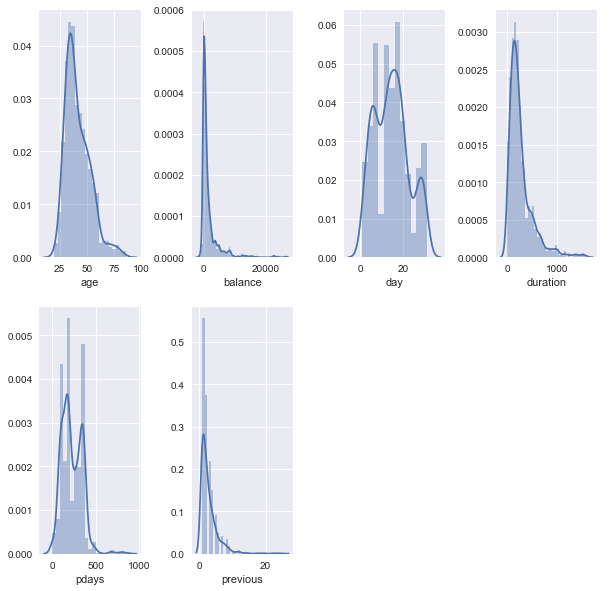

In [8]:
df_new = df[df["pdays"] > 0].reset_index()
fig,axes=plt.subplots(2,4)
nrow=0
ncol=0
for col in num_var:
    if ncol <4:
       fig.set_figheight(10)
       fig.set_figwidth(10)
       sb.distplot(df_new[col],hist=True,kde=True,ax=axes[nrow,ncol])
       ncol +=1
    else:
        nrow +=1
        ncol=0
fig.subplots_adjust(wspace=0.5) 
axes[1,2].axis("off")
axes[1,3].axis("off")
plt.show()

In [9]:
for col in num_var:
    print("Column Name:", col)
    print("Mean:",round(np.mean(df_new[col]),2))
    print("Median:",round(np.median(df_new[col]),2))
    print("Standard Deviation:",round(np.std(df_new[col]),2),)
    count=0
    for i in range(len(df_new)):
        if df_new.loc[i,col] == "" or df_new.loc[i,col]=="NA":
            count +=1
    print(f"Number of Missing Values in {col} is {count}")
    print(f"Percentage of Missing Values in {col} is {np.round(count/len(df_new),2)}\n")
        
            

Column Name: age
Mean: 41.56
Median: 39.0
Standard Deviation: 11.44
Number of Missing Values in age is 0
Percentage of Missing Values in age is 0.0

Column Name: balance
Mean: 1639.67
Median: 631.5
Standard Deviation: 3005.14
Number of Missing Values in balance is 0
Percentage of Missing Values in balance is 0.0

Column Name: day
Mean: 14.6
Median: 14.0
Standard Deviation: 7.85
Number of Missing Values in day is 0
Percentage of Missing Values in day is 0.0

Column Name: duration
Mean: 272.4
Median: 202.0
Standard Deviation: 245.21
Number of Missing Values in duration is 0
Percentage of Missing Values in duration is 0.0

Column Name: campaign
Mean: 2.02
Median: 1.0
Standard Deviation: 1.58
Number of Missing Values in campaign is 0
Percentage of Missing Values in campaign is 0.0

Column Name: pdays
Mean: 224.87
Median: 189.0
Standard Deviation: 117.13
Number of Missing Values in pdays is 0
Percentage of Missing Values in pdays is 0.0

Column Name: previous
Mean: 3.01
Median: 2.0
Standard

#### Determination of Outliers Using Box Plot 

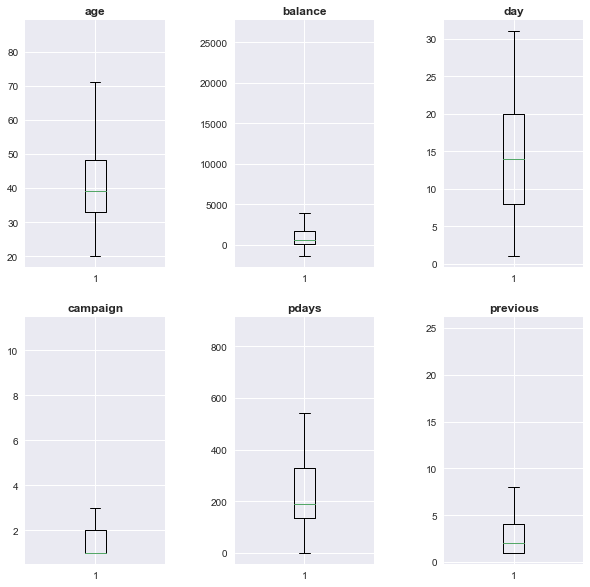

In [10]:
fig,axes = plt.subplots(2,3)
nrow=0
ncol=0

for col in num_var:
    if ncol <3:
       fig.set_figheight(10)
       fig.set_figwidth(10) 
       axes[nrow,ncol].set_title(col,fontweight="bold")
       axes[nrow,ncol].boxplot(df_new[col])
       ncol +=1
    else:
        nrow +=1
        ncol=0
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Simple Correlation Plot 

In [11]:
print(f"Correlation Matrix of Numeric Variables {num_var}")

Correlation Matrix of Numeric Variables ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


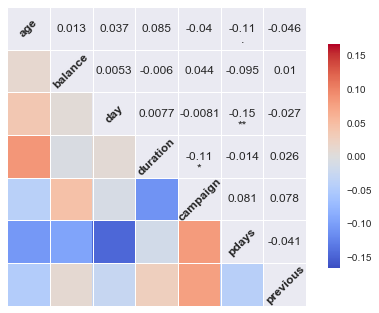

In [12]:
corrplot(df_new[num_var])
plt.show()

#### Correlation Plot Using Heatmap 

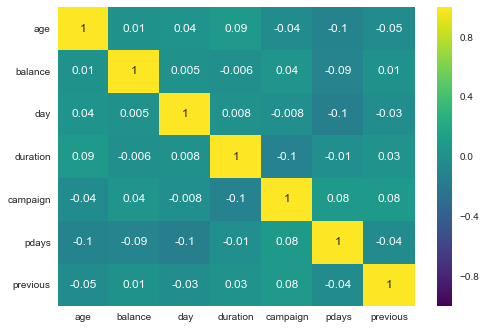

In [13]:
sb.heatmap(df_new[num_var].corr(),annot=True,fmt=".1g",cmap="viridis")
plt.show()

#### Determination of Class Imbalance 

In [14]:
def class_imbalance(df):
    yes = df[df["y"]=="yes"]
    no = df[df['y']== "no"]
    pyes = len(yes)*100/(len(no)+len(yes))
    pno = 100-pyes
    print("Percentage of 'Yes' Class:",round(pyes,2),"%")
    print("Percentage of No Class:",round(pno,2),"%")
    if (pyes != pno):
        print("Class Imbalance Exsists\n")
    else:
        print("No Class Imbalance Exsists\n")
    plt.figure(figsize=(4,4))
    xlab = ["Yes","No"]
    xpos =np.arange(len(xlab))
    ylab=[pyes/100,pno/100]
    plt.bar(xpos,ylab,width=0.4,alpha=0.7)
    plt.xticks(xpos,xlab)
    plt.title("Class Imblance")
    plt.legend()
    plt.show()

Percentage of 'Yes' Class: 22.55 %
Percentage of No Class: 77.45 %
Class Imbalance Exsists



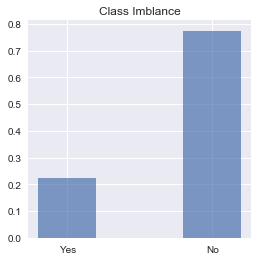

In [15]:
class_imbalance(df_new)

#### Analysis of Categorical Variables 

In [16]:
print("Total number of Categorical Variables:",len(categorical_var)-1)

Total number of Categorical Variables: 9


In [17]:
print("Frequency Table for Categorical Variables:")
print("*"*30)
for col in categorical_var:
    print("Categorical Variable:",col)
    print(pd.crosstab(index=df_new[col],columns="Count",dropna=True))
    print("*"*30)

Frequency Table for Categorical Variables:
******************************
Categorical Variable: job
col_0          Count
job                 
admin.           108
blue-collar      152
entrepreneur      23
housemaid         18
management       186
retired           49
self-employed     28
services          62
student           22
technician       141
unemployed        21
unknown            6
******************************
Categorical Variable: marital
col_0     Count
marital        
divorced     85
married     492
single      239
******************************
Categorical Variable: education
col_0      Count
education       
primary       98
secondary    415
tertiary     266
unknown       37
******************************
Categorical Variable: default
col_0    Count
default       
no         811
yes          5
******************************
Categorical Variable: housing
col_0    Count
housing       
no         300
yes        516
******************************
Categorical Variable: loan


In [18]:
target = "y"
print("Two-way Table for Categorical Variables")
print("*"*30)
for col in categorical_var:
    if col != "y":
       print("Categorical Variable:",col)
       print(pd.crosstab(index=df_new[target],columns=df_new[col],dropna=True))
    print("*"*30)

Two-way Table for Categorical Variables
******************************
Categorical Variable: job
job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no       81          135            20         13         136       33   
yes      27           17             3          5          50       16   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no              24        48       14         110          16        2  
yes              4        14        8          31           5        4  
******************************
Categorical Variable: marital
marital  divorced  married  single
y                                 
no             64      385     183
yes            21      107      56
******************************
Categorical Variable: education
education  primary  secondary  tertiary  unknown
y

In [19]:
print("Two-way Table - Joint Probability for Categorical Variables")
print("*"*30)
for col in categorical_var:
    if col != "y":
       print("Categorical Variable:",col)
       print(pd.crosstab(index=df_new[target],columns=df[col],normalize=True,dropna=True))
    print("*"*30)

Two-way Table - Joint Probability for Categorical Variables
******************************
Categorical Variable: job
job    admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                           
no   0.079657     0.159314      0.029412   0.018382    0.165441  0.042892   
yes  0.020833     0.040441      0.009804   0.003676    0.052696  0.012255   

job  self-employed  services   student  technician  unemployed   unknown  
y                                                                         
no        0.034314  0.062500  0.019608    0.136029    0.023284  0.003676  
yes       0.020833  0.015931  0.003676    0.039216    0.003676  0.002451  
******************************
Categorical Variable: marital
marital  divorced   married    single
y                                    
no       0.087010  0.470588  0.216912
yes      0.026961  0.136029  0.062500
******************************
Categorical Variable: educatio

In [17]:
print("Two-way Table - Marginal Probability for Categorical Variables")
print("*"*30)
for col in categorical_var:
    if col != "y":
       print("Categorical Variable:",col)
       print(pd.crosstab(index=df[target],columns=df[col],normalize=True,margins=True,dropna=True))
    print("*"*30)

Two-way Table - Marginal Probability for Categorical Variables
******************************
Categorical Variable: job
job    admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                           
no   0.092900     0.193984      0.033842   0.021677    0.185357  0.038929   
yes  0.012829     0.015262      0.003318   0.003097    0.028976  0.011944   
All  0.105729     0.209246      0.037160   0.024773    0.214333  0.050874   

job  self-employed  services   student  technician  unemployed   unknown  \
y                                                                          
no        0.036054  0.083831  0.014377    0.151515    0.025437  0.006857   
yes       0.004424  0.008405  0.004203    0.018359    0.002875  0.001548   
All       0.040478  0.092236  0.018580    0.169874    0.028312  0.008405   

job      All  
y             
no   0.88476  
yes  0.11524  
All  1.00000  
******************************
Categor

In [20]:
print("Two-way Table - Conditional Probability for Categorical Variables")
print("*"*30)
for col in categorical_var:
    if col != "y":
       print("Categorical Variable:",col)
       print(pd.crosstab(index=df[target],columns=df[col],normalize="index",margins=True,dropna=True))
    print("*"*30)    



Two-way Table - Conditional Probability for Categorical Variables
******************************
Categorical Variable: job
job    admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                           
no   0.105000     0.219250      0.038250   0.024500    0.209500  0.044000   
yes  0.111324     0.132438      0.028791   0.026871    0.251440  0.103647   
All  0.105729     0.209246      0.037160   0.024773    0.214333  0.050874   

job  self-employed  services   student  technician  unemployed   unknown  
y                                                                         
no        0.040750  0.094750  0.016250    0.171250    0.028750  0.007750  
yes       0.038388  0.072937  0.036468    0.159309    0.024952  0.013436  
All       0.040478  0.092236  0.018580    0.169874    0.028312  0.008405  
******************************
Categorical Variable: marital
marital  divorced   married    single
y                

#### One Hot Encoding 

In [21]:
categorical_var = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
for col in categorical_var:
    dummy = pd.get_dummies(df_new[col],prefix=col)
    df_new = df_new.join(dummy)
    col_lst = [col for col in df_new.columns if col not in categorical_var]
    df_temp=df_new[col_lst]
df_temp    

,index,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,1,33,4789,11,220,1,339,4,no,0,...,0,0,0,1,0,0,0,1,0,0
1,2,35,1350,16,185,1,330,1,no,0,...,0,0,0,0,0,0,0,1,0,0
2,5,35,747,23,141,2,176,3,no,0,...,0,0,0,0,0,0,0,1,0,0
3,6,36,307,14,341,1,330,2,no,0,...,0,0,0,1,0,0,0,0,1,0
4,9,43,-88,17,313,1,147,2,no,0,...,0,0,0,0,0,0,0,1,0,0
5,14,31,360,29,89,1,241,1,no,0,...,0,0,0,0,0,0,0,1,0,0
6,17,37,2317,20,114,1,152,2,no,1,...,0,0,0,0,0,0,0,1,0,0
7,19,31,132,7,148,1,152,1,no,0,...,1,0,0,0,0,0,0,0,1,0
8,27,67,696,17,119,1,105,2,no,0,...,0,0,0,0,0,0,0,1,0,0
9,38,33,3935,6,765,1,342,2,yes,0,...,0,0,0,1,0,0,0,1,0,0


#### Accuracy 

In [22]:
target_encoding = {"no":0,"yes":1}
Ytrain = df_temp["y"].map(target_encoding)
Xtrain = df_temp.drop("y",axis=1)
lgreg = LogisticRegression()
lr = lgreg.fit(Xtrain,Ytrain)
lgreg_acc = round(lr.score(Xtrain,Ytrain)*100,2)
print("\nAccuracy of Logistic Regression:",lgreg_acc)


Accuracy of Logistic Regression: 83.82


In [23]:
lr_predicted = lr.predict(Xtrain)
confusion_matrix=confusion_matrix(Ytrain,lr_predicted)
confusion_matrix

array([[594,  38],
       [ 94,  90]])

#### Confusion Matrix 

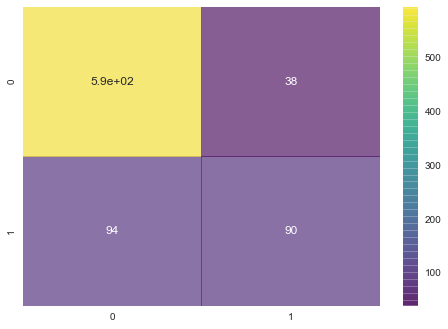

In [24]:
sb.heatmap(confusion_matrix,annot=True,cmap="viridis",alpha=.6)
plt.show()

#### Precision Score 

In [25]:
precision_score(Ytrain,lr_predicted)

0.703125

#### Recall Score 

In [26]:
recall_score(Ytrain,lr_predicted)

0.4891304347826087

#### F1 Score 

In [27]:
f1_score(Ytrain,lr_predicted)

0.57692307692307698

#### Receiver Operating Characteristic (ROC) 

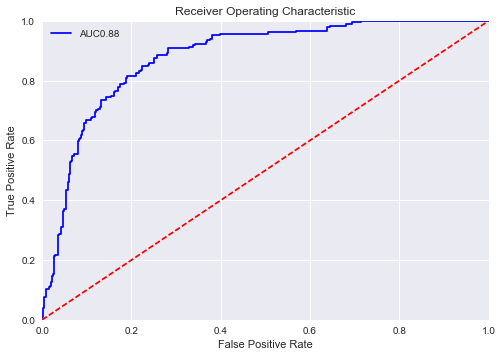

In [28]:
lr_proba = lr.predict_proba(Xtrain)[::,1]
fpr,tpr,_=roc_curve(Ytrain,lr_proba)
acc = auc(fpr, tpr)
labels="AUC"+str(np.round(acc,2))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = labels)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Cross Validated Score 

In [29]:
lr_cross_acc = cross_val_score(lr,Xtrain,Ytrain,cv=10,scoring="accuracy")
print(f"Mean Cross Validated Accuracy {lr_cross_acc.mean()}")
print(f"Standard Validation of Cross Validated Accuracy {lr_cross_acc.std()}")

Mean Cross Validated Accuracy 0.8198472299314693
Standard Validation of Cross Validated Accuracy 0.02693200560580785


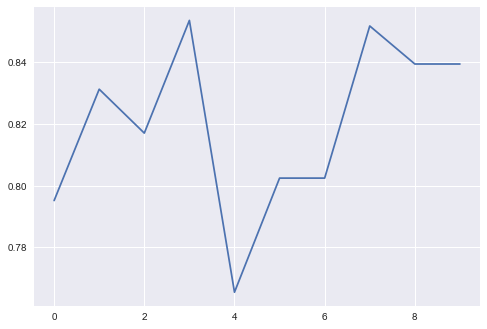

In [30]:
plt.plot(lr_cross_acc)
plt.show()

#### Cohen's Kappa Score 

In [35]:
kappa_score=cohen_kappa_score(Ytrain,lr_predicted)
kappa_score

0.48087600246761253

#### References: 

1. Lecture Notes of Andrew Ng